In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
df=pd.read_csv("sample_data/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.rename(columns={"Unit price":"Harga_satu_barang","Tax 5%": "Tax_lima_persen"}, inplace=True)

## Cleansing Data

In [4]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Harga_satu_barang          0
Quantity                   0
Tax_lima_persen            0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df["Date"]=pd.to_datetime(df["Date"])
df["Tanggal"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Harga_satu_barang,Quantity,Tax_lima_persen,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Tanggal,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2


In [6]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Harga_satu_barang                 float64
Quantity                            int64
Tax_lima_persen                   float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Tanggal                             int64
Month                               int64
dtype: object

### Memeriksa Korelasi

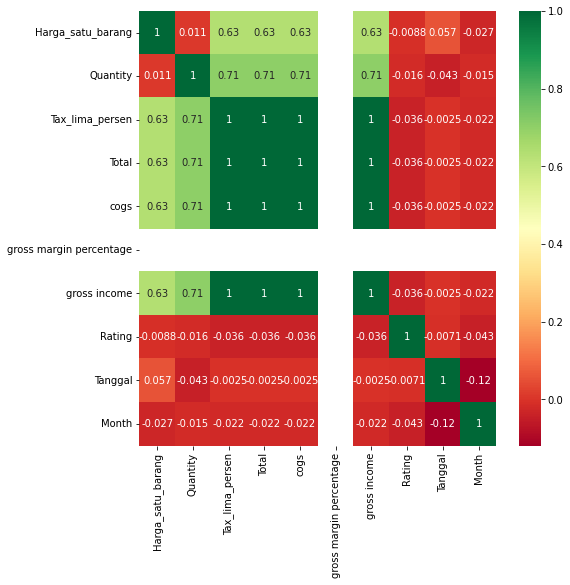

In [7]:
#plotting heatmap for overall data set
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)

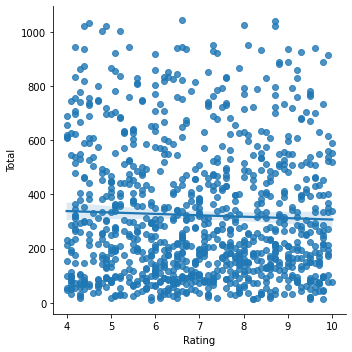

In [8]:
sns.lmplot(x="Rating", y="Total", data=df)

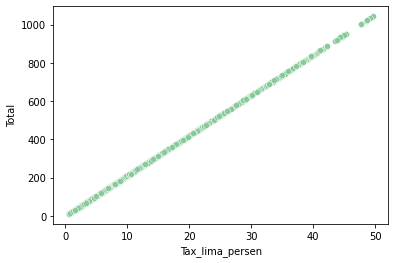

In [9]:
sns.scatterplot(x="Tax_lima_persen", y="Total", data=df, color="#88c999")

## Proses Training dan Membuat Model

In [10]:
# Persiapkan data
X = df[["Rating","Harga_satu_barang","Quantity","Tax_lima_persen"]]
y = df[["Total"]]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
# Buat model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Uji Coba

In [13]:
regressor.coef_, regressor.intercept_

(array([[6.89725701e-15, 0.00000000e+00, 2.95319325e-14, 2.10000000e+01]]),
 array([-1.70530257e-13]))

In [14]:
regressor.predict(X_test)

array([[  63.315 ],
       [ 477.1305],
       [  74.76  ],
       [ 333.207 ],
       [ 232.638 ],
       [ 312.8895],
       [ 419.832 ],
       [ 170.877 ],
       [ 107.142 ],
       [ 836.304 ],
       [  58.2225],
       [ 185.367 ],
       [ 154.392 ],
       [  74.088 ],
       [  80.661 ],
       [  85.5855],
       [ 295.407 ],
       [ 408.408 ],
       [ 499.7265],
       [ 352.2225],
       [ 921.186 ],
       [ 400.764 ],
       [ 609.    ],
       [ 796.908 ],
       [  41.076 ],
       [ 506.6355],
       [  13.167 ],
       [  26.733 ],
       [ 420.2625],
       [ 122.472 ],
       [  55.881 ],
       [ 145.971 ],
       [ 152.712 ],
       [  30.408 ],
       [ 120.162 ],
       [ 218.0745],
       [  77.175 ],
       [  26.7225],
       [ 208.6875],
       [ 279.384 ],
       [ 141.75  ],
       [ 652.89  ],
       [ 397.845 ],
       [ 198.639 ],
       [  20.1075],
       [ 439.215 ],
       [ 313.572 ],
       [ 216.846 ],
       [ 551.124 ],
       [  88.368 ],


### Evaluasi Model

In [15]:
#check prediction score/accuracy
regressor.score(X_test, y_test)

1.0

### Hasil Prediksi di DataFrame

In [16]:
# predict the y values
y_pred=regressor.predict(X_test)

# data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head()

,Actual,Predicted
0,63.3150,63.3150
1,477.1305,477.1305
2,74.7600,74.7600
3,333.2070,333.2070
4,232.6380,232.6380


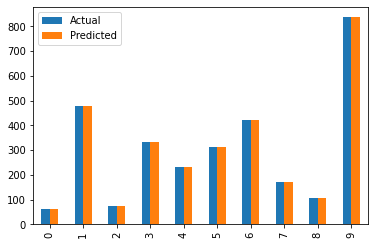

In [17]:
evaluate.head(10).plot(kind = 'bar')

### Evaluasi Lanjutan

In [18]:
# Scoring the model
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

MSE score: 6.359081384004397e-27


### User interface dengan gradio

In [19]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.9 MB/s 
     |████████████████████████████████| 212 kB 42.3 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 56.4 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.0 MB 22.6 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 256 kB 58.4 MB/s 
     |████████████████████████████████| 144 kB 60.7 MB/s 
     |████████████████████████████████| 271 kB 51.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 11.1 MB 44.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 5.8 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 4.0 M

In [20]:
import gradio as gr

def predict(Rating, Harga_satu_barang, Quantity,Tax_lima_persen):
    return regressor.predict([[Rating, Harga_satu_barang, Quantity,Tax_lima_persen]])[0][0]

demo = gr.Interface(fn=predict,
      inputs=[gr.Number(label="Rating Barang"),gr.Number(label="Harga per item"),
              gr.Number(label="Quantitas"), gr.Number(label="Tax 5%")],
      outputs=[gr.Number(label="Total Harga")])

demo.launch()                                                                   

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://45504.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f8cbb48e250>,
 'http://127.0.0.1:7860/',
 'https://45504.gradio.app')